## Time series plot of HadISD data

Loads HadISD data for weather stations in Warsaw and Madrid. The weather stations for Warsaw and Madrid are found as those relatively close to the city borders, for both cities. We identify the stations by their station IDs, which are:
- Madrid: 082210, 082230, 082240, 082270
- Warsaw: 121051, 123750


In [1]:
# Loads data for Warsaw and Madrid from different sources, plots time series for max temperature and humidity
# necessary imports
import xarray as xr  # xarray for formatting netcdf files
import matplotlib.pyplot as plt

In [2]:
from local_paths import hadisd_path

In [3]:
stations_warsaw = ['121051', '123750']
stations_madrid = ['082210', '082230', '082240', '082270']

In [4]:
madrid_ds = [ xr.open_dataset(hadisd_path('madrid_{}.nc'.format(station))) for station in stations_madrid]
warsaw_ds = [ xr.open_dataset(hadisd_path('warsaw_{}.nc'.format(station))) for station in stations_warsaw]
madrid_hum_ds = [ xr.open_dataset(hadisd_path('madrid_{}_humidity.nc'.format(station))) 
                 for station in stations_madrid]
warsaw_hum_ds = [ xr.open_dataset(hadisd_path('warsaw_{}_humidity.nc'.format(station))) 
                 for station in stations_warsaw]

The temperature data and the Madrid humidity data include some flagged values, which are given the data value -2e30. We remove these manually. 

In [15]:
warsaw_temps = [ds['temperatures'].where(ds.temperatures != -2e+30) for ds in warsaw_ds ]
madrid_temps = [ds['temperatures'].where(ds.temperatures != -2e+30) for ds in madrid_ds] 

madrid_hum = [ds['specific_humidity'].where(ds['specific_humidity'] != -2e+30) for ds in madrid_hum_ds]

In [9]:
# nice color palette:
shades_of_blue = ['teal', 'aqua', 'lightblue', 'deepskyblue', 'steelblue', 'dodgerblue', 'cornflowerblue']

We plot the resulting data as time series

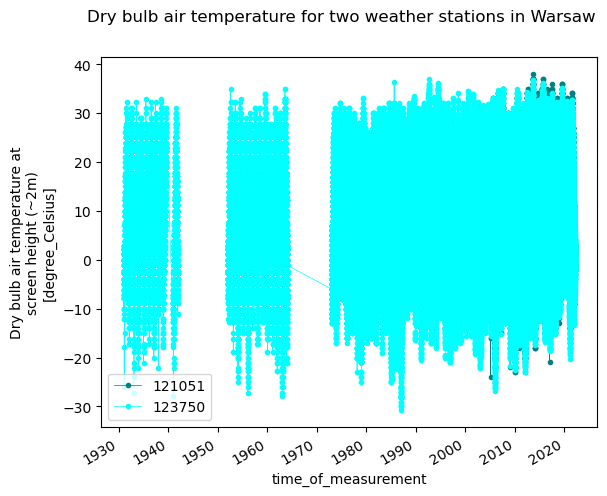

In [16]:
fig, ax = plt.subplots(nrows=1, ncols = 1)

for idx, station in enumerate(warsaw_temps):
    station.plot(color = shades_of_blue[idx], linewidth = 0.5, ax = ax, label = stations_warsaw[idx], marker = ".")

plt.legend()
fig.suptitle("Dry bulb air temperature for two weather stations in Warsaw")
plt.show()

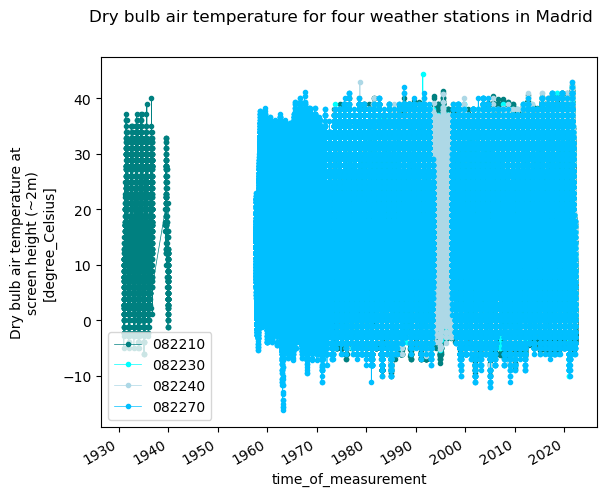

In [11]:
fig, ax = plt.subplots(nrows=1, ncols = 1)

for idx, station in enumerate(madrid_temps):
    station.plot(color = shades_of_blue[idx], linewidth = 0.5, ax = ax, label = stations_madrid[idx], marker = ".")

plt.legend()
fig.suptitle("Dry bulb air temperature for four weather stations in Madrid")
plt.show()

# Humidity, Warsaw:
warsaw_hum = [ds['specific_humidity'].where(ds['specific_humidity'] != -2e+30) for ds in warsaw_hum_ds]

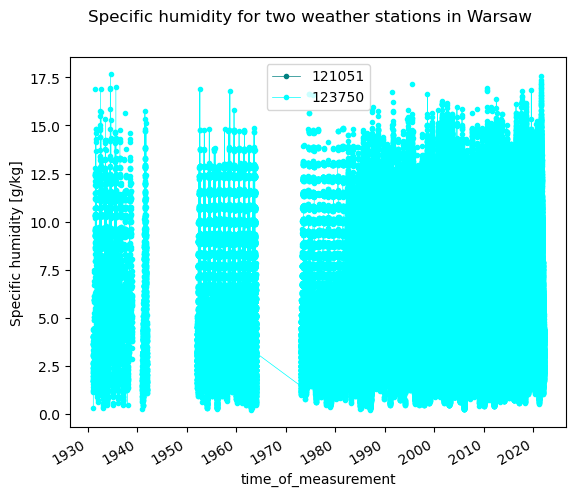

In [17]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)

for idx, station in enumerate(warsaw_hum):
    station.plot(color = shades_of_blue[idx], linewidth = 0.5, ax = ax, label = stations_warsaw[idx], marker = ".")

plt.legend()
fig.suptitle("Specific humidity for two weather stations in Warsaw")
plt.show()

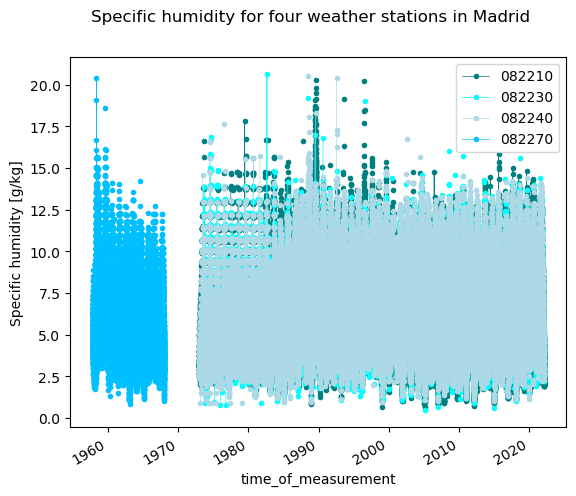

In [18]:
fig, ax = plt.subplots(nrows = 1, ncols = 1)

for idx, station in enumerate(madrid_hum):
    station.plot(color = shades_of_blue[idx], linewidth = 0.5, ax = ax, label = stations_madrid[idx], marker = ".")

plt.legend()
fig.suptitle("Specific humidity for four weather stations in Madrid")
plt.show()